# Ferromagnetic 2D square lattice XY model using NumPy and Numba

## Import the required libraries.

In [3]:
import numpy as np
from Metropolis_functions import Metropolis
from Observables_functions import get_energy_per_spin_per_lattice
import matplotlib.pyplot as plt
import data_blockage_errors as error
import matplotlib.animation as animation
from IPython.display import HTML

## Initialise the required variables

In [4]:
J = 1 # coupling constant, where it must be > 0 for the system to exhibit ferromagnetism
L = 64 # dimension of the square lattice

tau = 800000 # relaxation time a.k.a equilibrating time
tau_extra = 500000
nrelax = 1 # total number of times to let the system equilibrate
nframes = 1 # total number of frames in the .gif over the whole simulation (not needed since we are not generating the animated .gif in this notebook)
# N = nrelax * tau # total number of iterations in the Metropolis algorithm
plot_at_Nth_index = np.array([0],dtype=np.int32) # (not needed since we are not generating the animated .gif in this notebook)

lattice = np.zeros((L, L))

Tc = 0.892937 * J  # http://www.lps.ens.fr/~krauth/images/7/72/Stage_Mayer_Johannes_2015.pdf in units of kB
T_init = 2
T_final = 0.00001
TTc_array = np.linspace(T_init, T_final, nrelax)

In [46]:
reduced_interval   = int(L**2/2)
reduced_extra_time = int( np.ceil(tau_extra/reduced_interval) )

In [47]:
reduced_extra_time

245

## Begin the Metropolis time-marching on the lattice

In [5]:
M2, E, E2, lattices, _ = Metropolis(
    J=J,
    L=L,
    relaxation_time=tau,
    extra_time=tau_extra,
    lattice=lattice,
    T_init=T_init,
    T_final=T_final,
    T_n=nrelax,
    plot_at_Nth_index=plot_at_Nth_index,
    save_for_plot=True)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mNameError: name 'index_history' is not defined[0m

In [19]:
temp_m2, M2_blocked, error_M2, _, _ = error.get_error_block(obs=np.mean(M2,axis=1),T_i=0,T_f=2,size=25)

(0.0, 1.05)

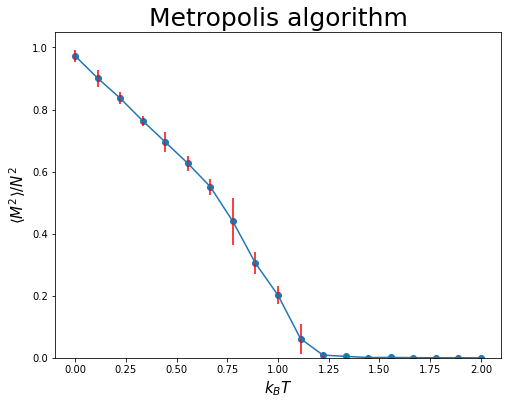

In [20]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_m2,M2_blocked)
plt.errorbar(temp_m2,M2_blocked,yerr=error_M2,ecolor='red')
plt.title(r'Metropolis algorithm',size=25)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$\langle M^2\rangle/N^2$',size=15)
plt.ylim(0,1.05)

In [21]:
cv = (np.mean(E2,axis=1)-np.mean(np.array(E),axis=1)**2)/((64**2*TTc_array**2))
temp_cv, cv_blocked, error_cv, _, _ = error.get_error_block(obs=cv,T_i=0,T_f=2,size=20,tau=25)

Text(0, 0.5, '$C_v$')

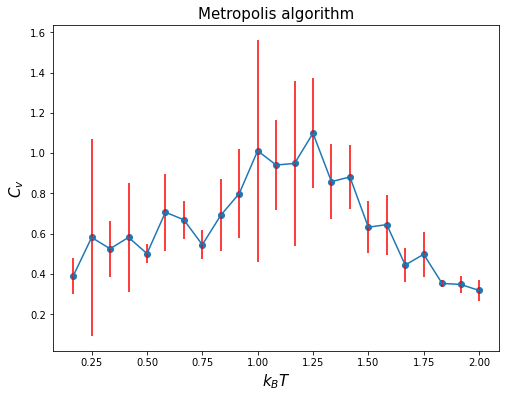

In [22]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_cv[2:],cv_blocked[2:])
plt.errorbar(temp_cv[2:],cv_blocked[2:],yerr=error_cv[2:],ecolor='red')
plt.title(r'Metropolis algorithm',size=15)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$C_v$',size=15)

## Study of vortices

In [58]:
np.shape(lattices)

(1, 64, 64)

In [2]:
fig = plt.figure(figsize=(8,8))
ims = []
for element in lattices:
    X, Y = np.mgrid[0:L, 0:L]
    U, V = np.cos(element.T), np.sin(element.T)
    quiver = plt.quiver(X,Y,U,V,edgecolor='k',facecolor='None',linewidth=.5)
    imsh = plt.imshow(element,vmin=-np.pi,vmax=np.pi,cmap='hsv')
    ims.append([quiver,imsh])

NameError: name 'plt' is not defined

In [54]:
%matplotlib inline
ani = animation.ArtistAnimation(fig, ims, interval=300, blit=True,
                                repeat_delay=1)
HTML(ani.to_html5_video())

In [36]:
sus_30 = np.nan_to_num((np.mean(m_30,axis=1)-np.mean(np.sqrt(m_30),axis=1)**2)*30**2/TTc_array)
sus_50 = np.nan_to_num((np.mean(m_50,axis=1)-np.mean(np.sqrt(m_50),axis=1)**2)*50**2/TTc_array)
sus_70 = np.nan_to_num((np.mean(m_70,axis=1)-np.mean(np.sqrt(m_70),axis=1)**2)*70**2/TTc_array)

In [37]:
temp_sus_30, sus_30_blocked, error_sus_30, _, _ = error.get_error_block(obs=sus_30,T_i=0,T_f=2,size=10,tau=15)
temp_sus_50, sus_50_blocked, error_sus_50, _, _ = error.get_error_block(obs=sus_50,T_i=0,T_f=2,size=10,tau=15)
temp_sus_70, sus_70_blocked, error_sus_70, _, _ = error.get_error_block(obs=sus_70,T_i=0,T_f=2,size=10,tau=15)

(0.0, 12.0)

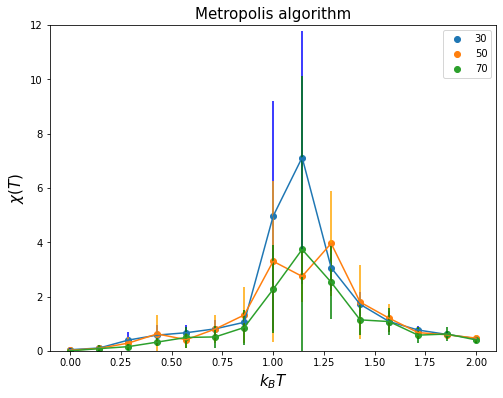

In [43]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_sus_30,sus_30_blocked)
plt.errorbar(temp_sus_30,sus_30_blocked,yerr=error_sus_30,ecolor='blue')
plt.scatter(temp_sus_50,sus_50_blocked)
plt.errorbar(temp_sus_50,sus_50_blocked,yerr=error_sus_50,ecolor='orange')
plt.scatter(temp_sus_70,sus_70_blocked)
plt.errorbar(temp_sus_70,sus_70_blocked,yerr=error_sus_70,ecolor='green')
plt.legend(ls)
plt.title(r'Metropolis algorithm',size=15)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$\chi(T)$',size=15)
plt.ylim(0,12)

## Run calculation in different size lattices

In [23]:
L = 30 # dimension of the square lattice
lattice = np.zeros((L, L))
m_30, en_30, en2_30, _, _ = Metropolis(
    J=J,
    L=L,
    relaxation_time=tau,
    extra_time=tau_extra,
    lattice=lattice,
    T_init=T_init,
    T_final=T_final,
    T_n=nrelax,
    plot_at_Nth_index=plot_at_Nth_index,
    save_for_plot=False)

L = 50 # dimension of the square lattice
lattice = np.zeros((L, L))
m_50, en_50, en2_50, _, _ = Metropolis(
    J=J,
    L=L,
    relaxation_time=tau,
    extra_time=tau_extra,
    lattice=lattice,
    T_init=T_init,
    T_final=T_final,
    T_n=nrelax,
    plot_at_Nth_index=plot_at_Nth_index,
    save_for_plot=False)

L = 70 # dimension of the square lattice
lattice = np.zeros((L, L))
m_70, en_70, en2_70, _, _ = Metropolis(
    J=J,
    L=L,
    relaxation_time=tau,
    extra_time=tau_extra,
    lattice=lattice,
    T_init=T_init,
    T_final=T_final,
    T_n=nrelax,
    plot_at_Nth_index=plot_at_Nth_index,
    save_for_plot=False)

In [24]:
temp_m_30, m_30_blocked, error_m_30, tau_, error_tau = error.get_error_block(obs=np.mean(m_30,axis=1),T_i=0,T_f=2,size=10)
temp_m_50, m_50_blocked, error_m_50, tau_, error_tau = error.get_error_block(obs=np.mean(m_50,axis=1),T_i=0,T_f=2,size=10)
temp_m_70, m_70_blocked, error_m_70, tau_, error_tau = error.get_error_block(obs=np.mean(m_70,axis=1),T_i=0,T_f=2,size=10)

In [26]:
ls = [30,50,70]

(0.0, 1.05)

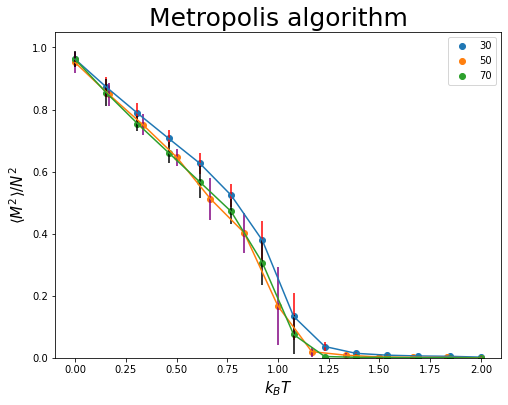

In [34]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_m_30,m_30_blocked)
plt.errorbar(temp_m_30,m_30_blocked,yerr=error_m_30,ecolor='red')
plt.scatter(temp_m_50,m_50_blocked)
plt.errorbar(temp_m_50,m_50_blocked,yerr=error_m_50,ecolor='purple')
plt.scatter(temp_m_70,m_70_blocked)
plt.errorbar(temp_m_70,m_70_blocked,yerr=error_m_70,ecolor='black')
plt.legend(ls)
plt.title(r'Metropolis algorithm',size=25)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$\langle M^2\rangle/N^2$',size=15)
plt.ylim(0,1.05)

In [29]:
cv_30 = (np.mean(en2_30,axis=1)-np.mean(np.array(en_30),axis=1)**2)/((30**2*TTc_array**2))
cv_50 = (np.mean(en2_50,axis=1)-np.mean(np.array(en_50),axis=1)**2)/((50**2*TTc_array**2))
cv_70 = (np.mean(en2_70,axis=1)-np.mean(np.array(en_70),axis=1)**2)/((70**2*TTc_array**2))

In [30]:
temp_cv_30, cv_blocked_30, error_cv_30, _, _ = error.get_error_block(obs=cv_30,T_i=0,T_f=2,size=20,tau=15)
temp_cv_50, cv_blocked_50, error_cv_50, _, _ = error.get_error_block(obs=cv_50,T_i=0,T_f=2,size=20,tau=15)
temp_cv_70, cv_blocked_70, error_cv_70, _, _ = error.get_error_block(obs=cv_70,T_i=0,T_f=2,size=20,tau=15)

Text(0, 0.5, '$C_v$')

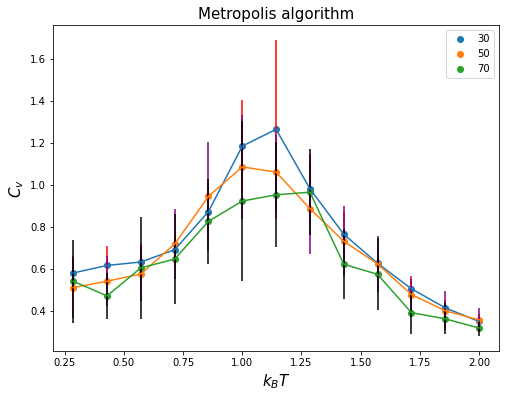

In [33]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_cv_30[2:],cv_blocked_30[2:])
plt.errorbar(temp_cv_30[2:],cv_blocked_30[2:],yerr=error_cv_30[2:],ecolor='red')
plt.scatter(temp_cv_50[2:],cv_blocked_50[2:])
plt.errorbar(temp_cv_50[2:],cv_blocked_50[2:],yerr=error_cv_50[2:],ecolor='purple')
plt.scatter(temp_cv_70[2:],cv_blocked_70[2:])
plt.errorbar(temp_cv_70[2:],cv_blocked_70[2:],yerr=error_cv_70[2:],ecolor='black')
plt.legend(ls)
plt.title(r'Metropolis algorithm',size=15)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$C_v$',size=15)

## Plotting the final lattice

The resulting lattice in phase space and energy space.


Text(0.5, 0.98, '$J$=1. $T$=1.79. $L$=64.')

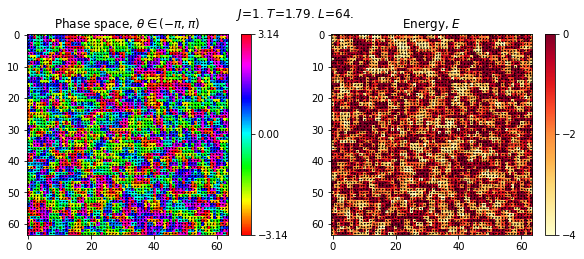

In [6]:
print("The resulting lattice in phase space and energy space.")
X, Y = np.mgrid[0:L, 0:L]
U, V = np.cos(lattice.T), np.sin(
    lattice.T)
E = get_energy_per_spin_per_lattice(
    J, lattice)
fig = plt.figure(figsize=(10, 3.7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.quiver(X,
            Y,
            U,
            V,
            edgecolor='k',
            facecolor='None',
            linewidth=.5)
im1 = ax1.imshow(lattice,
                    vmin=-np.pi,
                    vmax=np.pi,
                    cmap='hsv')
fig.colorbar(im1, ticks=[-3.14, 0, 3.14], ax=ax1)
ax1.set_title("Phase space, $θ\in(-\pi,\pi)$")

ax2.quiver(X,
            Y,
            U,
            V,
            edgecolor='k',
            facecolor='None',
            linewidth=.5)
im2 = ax2.imshow(E, vmin=-4, vmax=0, cmap='YlOrRd')
fig.colorbar(im2, ticks=[-4, -2, 0], ax=ax2)
ax2.set_title("Energy, $E$")
fig.suptitle( f"$J$={J}. $T$={np.round(T_final,2)}. $L$={L}." )

## Calculate the physical observables with the simulation results obtained

## Squared magnetisation

Its expression is given as $\frac{\left\langle M^2\right\rangle}{N^2}=\frac{1}{N^2}\left\langle\left(\sum_{i=1}^{N} \cos \theta_{i}\right)^{2}+\left(\sum_{i=1}^{N} \sin \theta_{i}\right)^{2}\right\rangle$ where $N=L\times L$.

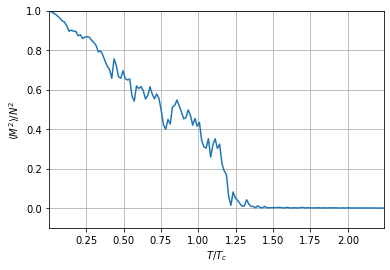

In [17]:
plt.close()
#plt.errorbar(TTc_array/Tc,M2_average, yerr=M2_errors, ecolor='red')
plt.plot(TTc_array/Tc,M2_average)
plt.xlabel("$T/T_c$")
plt.ylabel("$\langle M^2\\rangle/N^2$")
plt.ylim([-0.1,1])
plt.xlim([T_init/Tc,T_final/Tc])
plt.grid()
plt.savefig(f"simulation_images/magnetisationsquared_L{L}_tau{tau}_nrelax{nrelax}_Tinit{int(T_init/Tc)}_Tfinal{int(T_final/Tc)}.png", dpi=300, bbox_inches='tight',transparent=True)

## Specific heat

Its expression is given as $c / k_{\mathrm{B}}=\frac{\left\langle E^{2}\right\rangle-{\langle E\rangle}^{2}}{\left(k_{\mathrm{B}} T\right)^{2}}$ where $k_B$ is the Boltzmann's constant.

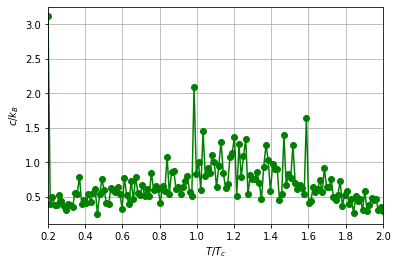

In [15]:
plt.close()
plt.plot( TTc_array/Tc ,(np.mean(E2,axis=1)-np.mean(E,axis=1)**2)/((L**2*TTc_array**2)) , 'g-o')
plt.xlabel("$T/T_c$")
plt.ylabel("$c/k_B$")
#plt.ylim([0,2])
plt.xlim([T_init/Tc,T_final/Tc])
plt.grid()
plt.savefig(f"simulation_images/specificheat_L{L}_tau{tau}_nrelax{nrelax}_Tinit{int(T_init/Tc)}_Tfinal{int(T_final/Tc)}.png", dpi=300, bbox_inches='tight',transparent=True)

In [27]:
Cv_average

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])